In [15]:
import os
import numpy as np
import pandas as pd
from rdkit import Chem
from rdchiral.main import rdchiralReaction, rdchiralReactants, rdchiralRun

from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = (800, 200)
IPythonConsole.highlightByReactant = True

def smi_tokenizer(smi):
    """
    Tokenize a SMILES molecule or reaction
    """
    import re
    pattern =  "(\[[^\]]+]|Br?|Cl?|N|O|S|P|F|I|b|c|n|o|s|p|\(|\)|\.|=|#|-|\+|\\\\|\/|:|~|@|\?|>|\*|\$|\%[0-9]{2}|[0-9])"
    regex = re.compile(pattern)
    tokens = [token for token in regex.findall(smi)]
    assert smi == ''.join(tokens)
    return ' '.join(tokens)

def visualize_chemical_reaction(reaction_smarts: str):
    # Create a RDKit reaction object from reaction SMARTS string
    reaction = AllChem.ReactionFromSmarts(reaction_smarts, useSmiles=True)
    # Display images
    display(reaction)

def load_data():
    train = pd.read_csv('../USPTO/raw_train.csv')[['reactants>reagents>production']]
    val = pd.read_csv('../USPTO/raw_val.csv')[['reactants>reagents>production']]
    test = pd.read_csv('../USPTO/raw_test.csv')[['reactants>reagents>production']]

    return train, val, test

train_df, val_df, test_df = load_data()

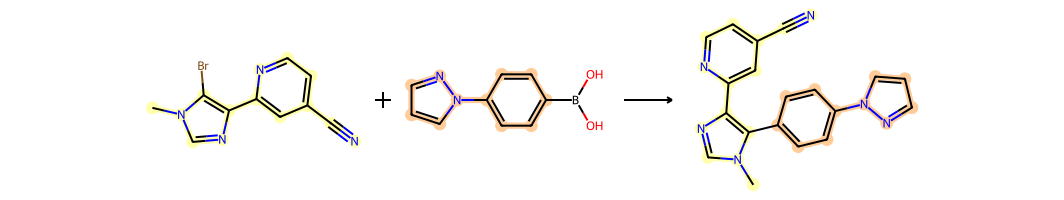

In [9]:
rxn_example = train_df.iloc[5,0]

visualize_chemical_reaction(rxn_example)

In [3]:
import pubchempy as pcp
results = pcp.get_compounds('Cinnamaldehyde', 'name')
print(results)

for compound in results:
     print(compound.canonical_smiles)

[Compound(637511)]
C1=CC=C(C=C1)C=CC=O


In [5]:
import pubchempy as pcp

# Use the SMILES you provided
smiles = 'O=C(O)C1CCCCN1'
compounds = pcp.get_compounds(smiles, namespace='smiles')
match = compounds[0]
print(match.iupac_name)

piperidine-2-carboxylic acid
